In [80]:
# some_file.py
# %load_ext autoreload
# %autoreload 2
from astropy.io import fits 
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(0, '/Users/hannahfronenberg/Documents/GitHub/pygdsm/pygdsm')
from pygsm2016 import GlobalSkyModel2016
from pygsm import GlobalSkyModel


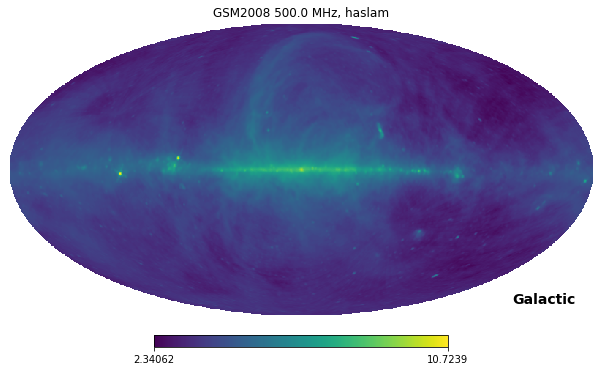

In [68]:
gsm = GlobalSkyModel(basemap = 'haslam')
gsm.generate(500)
gsm.view(logged=True)

/Users/hannahfronenberg/Documents/GitHub/pygdsm/pygdsm/base_skymodel.py:65: RuntimeWarning: invalid value encountered in log2
  gmap = np.log2(gmap)
/Users/hannahfronenberg/anaconda2/envs/p37workshop/lib/python3.7/site-packages/healpy/pixelfunc.py:345: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/hannahfronenberg/anaconda2/envs/p37workshop/lib/python3.7/site-packages/healpy/projaxes.py:1184: RuntimeWarning: invalid value encountered in less
  result.data[result.data < 0] = 0.0
/Users/hannahfronenberg/anaconda2/envs/p37workshop/lib/python3.7/site-packages/healpy/projaxes.py:1185: RuntimeWarning: invalid value encountered in greater
  result.data[result.data > 1] = 1.0


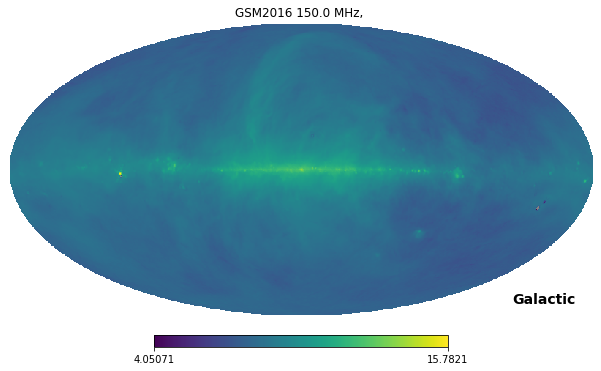

In [134]:
gsm_2016 = GlobalSkyModel2016(data_unit = 'TRJ')
gsm_2016.generate(150) # Generate at 30 GHz
gsm_2016.view(logged=True)

In [135]:
nside = 1024 # the Global sky model is in healpix format with Nside = 1024
hp.pixelfunc.ang2pix(1024,[1],[4])

array([2892335])

In [141]:
data = gsm_2016.generated_map_data

np.savetxt('pygsm_data.txt',data)

In [75]:
gsm_2016.generated_map_freqs

<Quantity 150. MHz>

In [150]:
df_gsm = pd.read_csv('pygsm_data.txt', sep=" ", header=None)
df_gsm.columns = ["Temp (K)"]

In [161]:
df_gsm["Temp (K)"].to_numpy()

array([108.45078278, 101.39488983,  98.60515594, ..., 125.03032684,
       128.82502747, 124.47205353])

AttributeError: 'DataFrame' object has no attribute 'as_matrix'